#### **Universidade Federal da Bahia.**
#### **Departamento de Eng. Elétrica e Computação**
#### **Avaliação 2 - Introdução ao Aprendizado de Máquina**
#### Semestre: 2023.2
#### Alunos : Ricardo Machado e Rodrigo Pimentel

### Questão 1: Utilizando o banco de dados "Iris Flower Data Set", aborde o problema de classificação utilizando o algoritmo k-NN. Implemente a classificação no Jupyter Notebook.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, mean_squared_error

plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = [8, 6]

In [6]:
#Carregamento do banco de dados.
iris = load_iris()
X = pd.DataFrame(data=iris.data, columns=iris.feature_names)
y = iris.target

In [7]:
#Divisão dos conjuntos de teste e treinamento.
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=0.3, random_state = 7, shuffle = True)

#### Verificando se os conjuntos de treinamento e teste são balanceados.

In [8]:
np.unique(y_train,return_counts=True)

(array([0, 1, 2]), array([38, 34, 33], dtype=int64))

In [9]:
np.unique(y_test,return_counts=True)

(array([0, 1, 2]), array([12, 16, 17], dtype=int64))

Percebe-se que os dois conjuntos são balanceados.

#### Determinação do número de vizinhos que resulta na maior acurácia para o modelo KNN.

A seleção do hiperparâmetro "número de vizinhos" é efetuada ao determinar o valor de K que resulta na maior acurácia por meio de um laço de repetição "for".

In [10]:
 #Cálculo da acucária do modelo KNN para diferentes números de vizinhos.
range_knn = range(1, 30, 2)
score_acuracia = []
for k in range_knn:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    score_acuracia.append(knn.score(X_test, y_test))

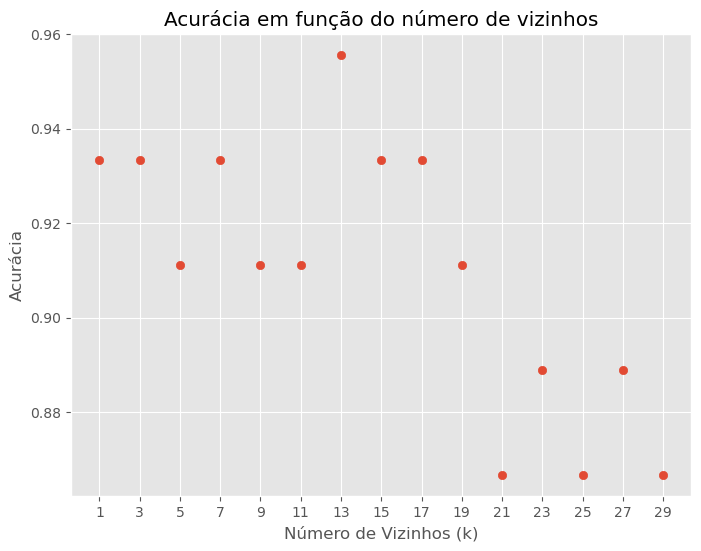

In [11]:
#Gráfico da acúracia vs K
plt.figure(1)
plt.scatter(range_knn,score_acuracia)
plt.xticks(range_knn)
plt.xlabel('Número de Vizinhos (k)')
plt.ylabel('Acurácia')
plt.title('Acurácia em função do número de vizinhos')
plt.show()

Pelo gráfico, a maior acurácia ocorre quando k = 13.

#### Configuração do modelo KNN utilizado no trabalho.


In [13]:
knn_classifier = KNeighborsClassifier(n_neighbors=13)

In [14]:
knn_classifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=13)

In [15]:
y_predict = knn_classifier.predict(X_test)

#### Medida de desempenho do modelo KNN.

In [16]:
accuracy_score(y_test,y_predict)

0.9555555555555556

A acurácia obtida ao testar o modelo com o conjunto de teste foi de 95,56%.

In [18]:
cm = confusion_matrix(y_test, y_predict)

Visualização da perfomance do modelo através da matriz de confusão.

[Text(0, 0.5, 'setosa'), Text(0, 1.5, 'versicolor'), Text(0, 2.5, 'virginica')]

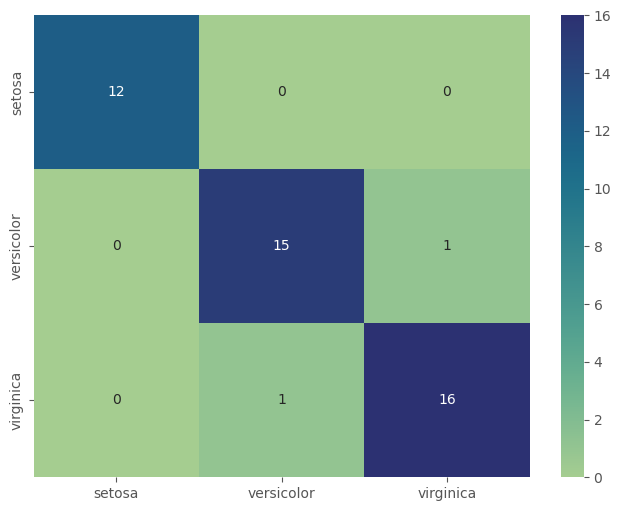

In [19]:
ax = sns.heatmap(cm, annot=True, fmt='d',cmap="crest")
ax.set_xticklabels(iris.target_names)
ax.set_yticklabels(iris.target_names, rotation=90, va='center')